Generate a cosine wave of amplitudes for the frequency provided in basis embedding.

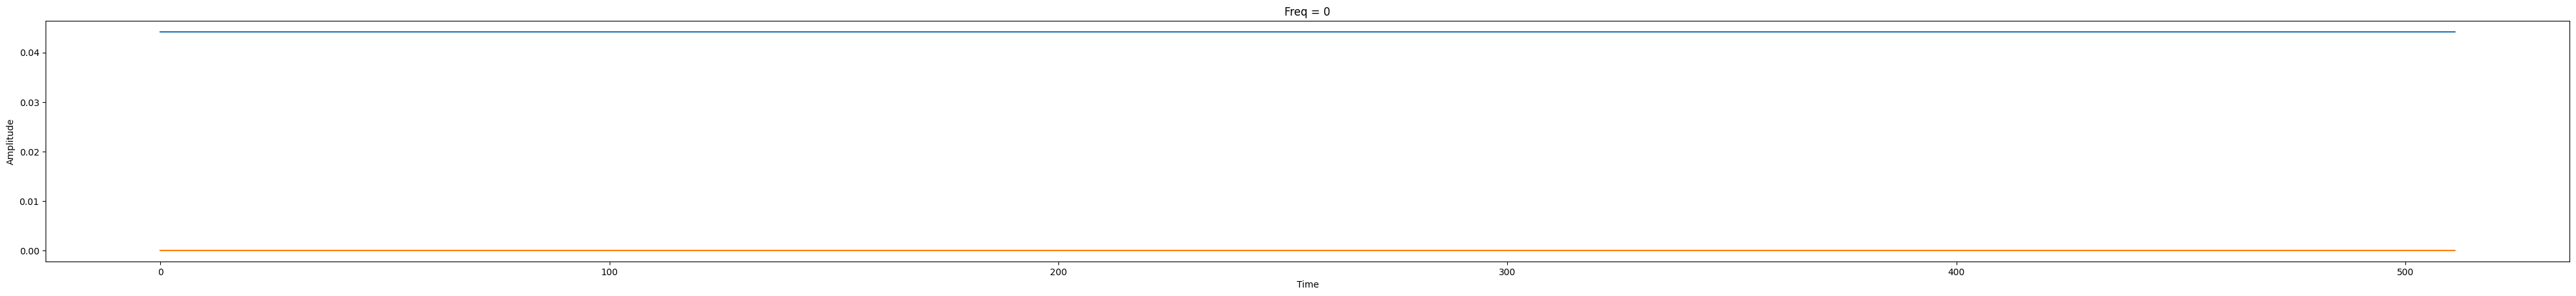

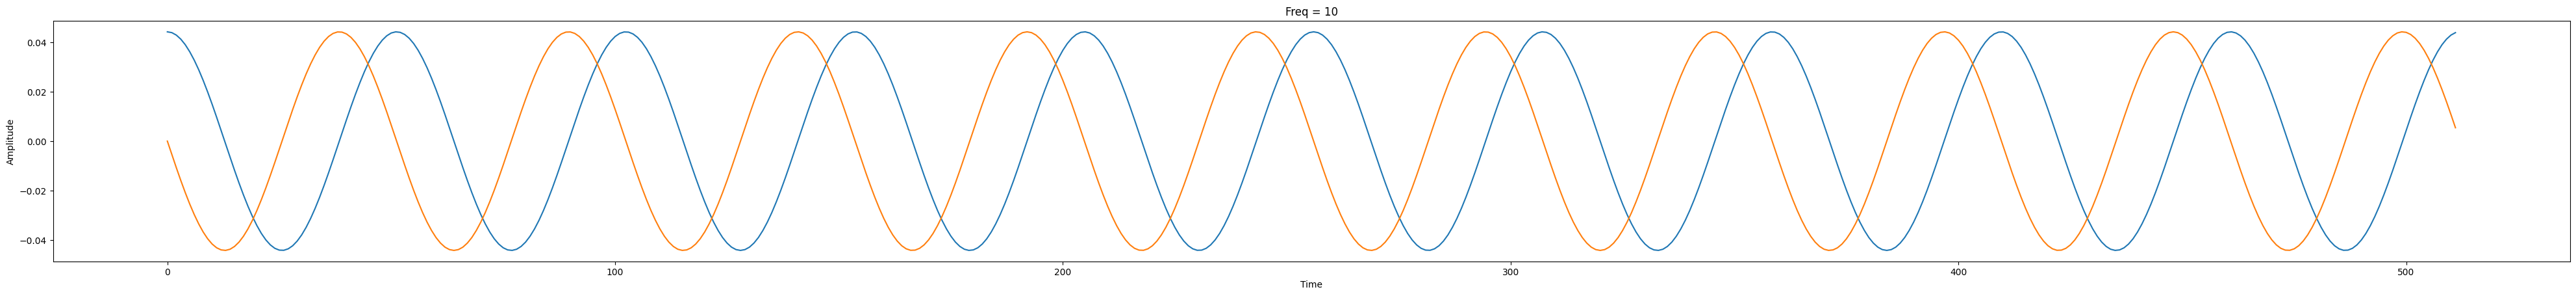

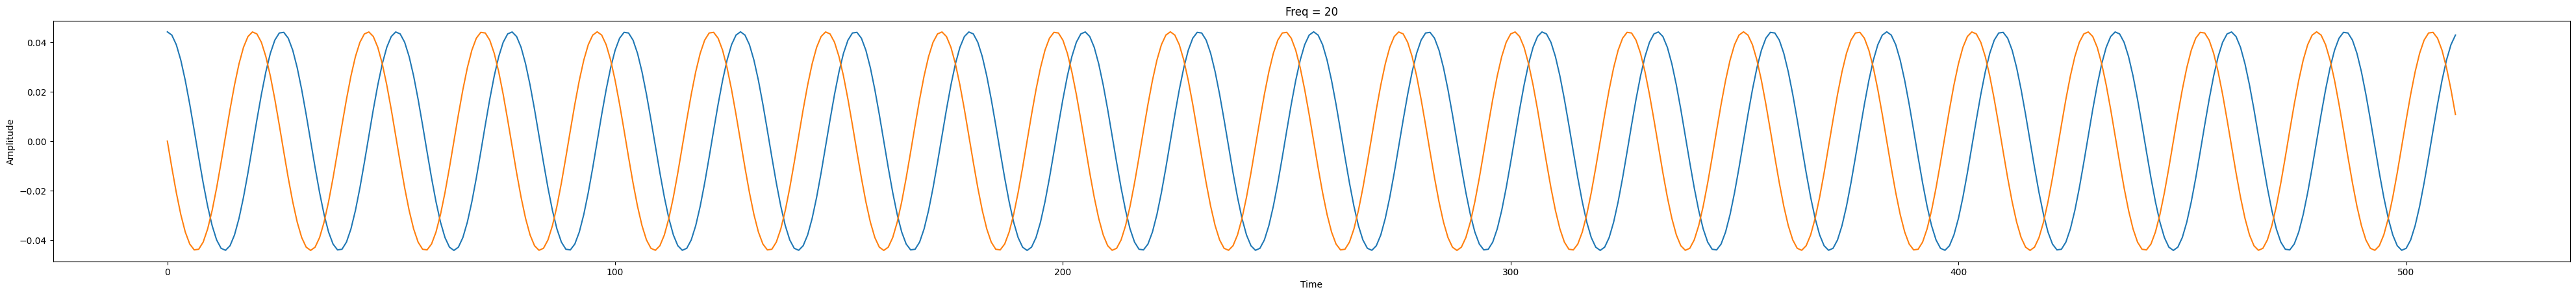

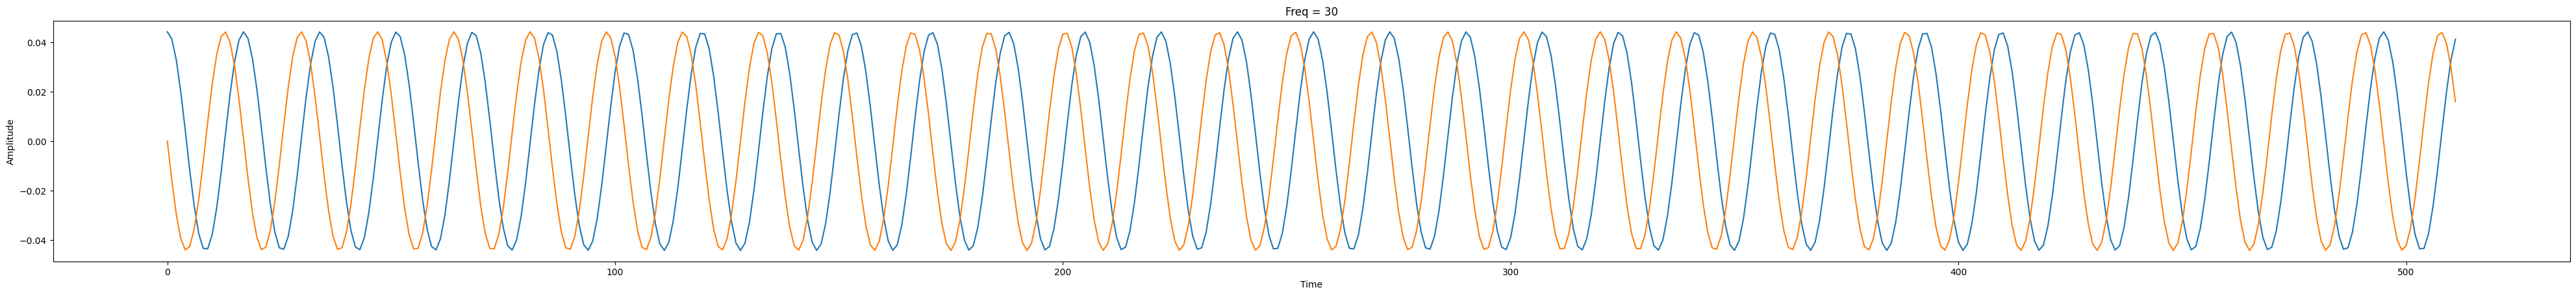

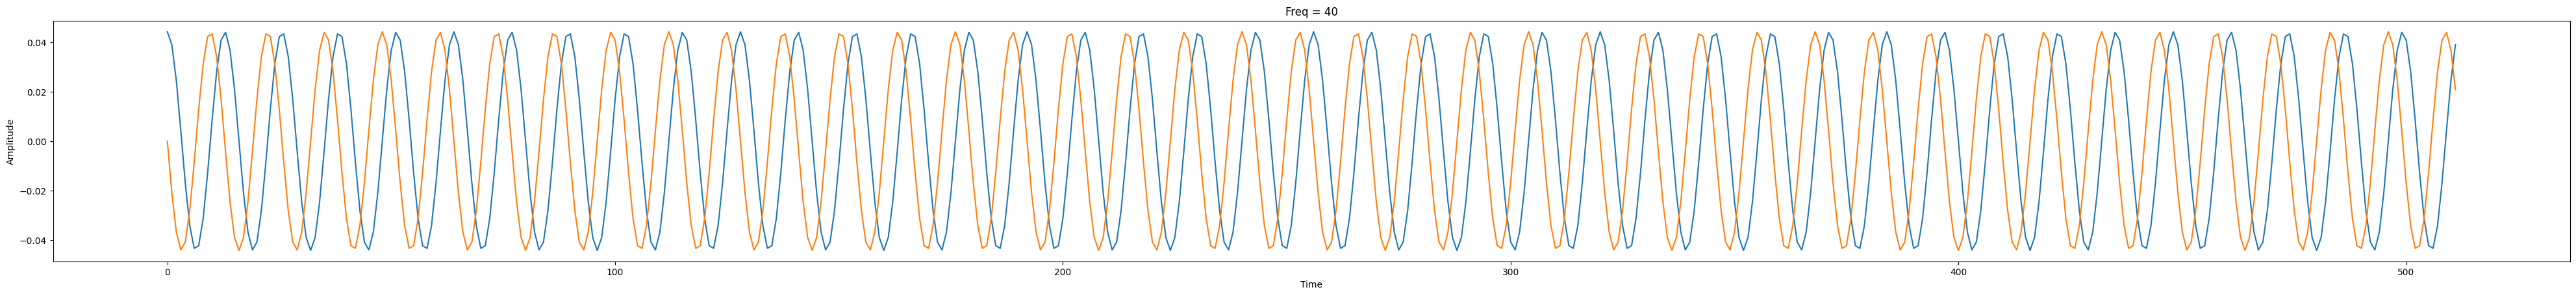

In [95]:
import pennylane as qml
import numpy as np 
import matplotlib.pyplot as plt 

def plot_graph(freq, samples):
    wires = int(np.log2(samples)) + 1
    dev = qml.device('lightning.qubit', wires=wires)

    @qml.qnode(dev)
    def circuit():
        bfreq = bin(freq)[2:]
        bfreq = "0"*(wires-len(bfreq))  + bfreq
        qml.BasisEmbedding([int(i) for i in bfreq], wires=range(wires))
        qml.adjoint(qml.QFT(wires=range(wires)))
        return qml.state()

    state = circuit()
    real_amplitudes = np.round(np.real(state), 5)
    img_amplitudes = np.round(np.imag(state), 5)

    plt.figure().set_figwidth(50)
    plt.plot(range(len(real_amplitudes)), real_amplitudes)
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.plot(range(len(real_amplitudes)), img_amplitudes)
    plt.title('Freq = '  +str(freq))
    plt.show()
    # qml.draw_mpl(circuit)()

for i in range(0,50,10):
    plot_graph(i, 500)
